In [1]:
sample_size <- 30
iterations  <- 1000
beta_0 <- 1
beta_1 <- -2.5
std_error <- 0.5

In [2]:
generate_x <- function(n){seq(-3,3,length.out = n)}
generate_y <- function(x, beta_0, beta_1){beta_0 + x*beta_1 + rnorm(length(x),0,std_error)}

In [3]:
generate_x(sample_size) -> x
generate_y(x, beta_0, beta_1) -> y 

In [4]:
lm(y~x) -> modelo
coefficients(modelo) -> coeficients
confint(modelo) -> intervalos_cofianza

In [5]:
coeficients

(Intercept)           x 
   1.064889   -2.530425

### Simulation 

In [6]:
beta_0_estimated <- beta_1_estimated <- vector()

In [7]:
for(i in seq_len(iterations)){
    #crear la muestra de los datos
    sample <- sample(seq_along(x), length(x), replace = TRUE)
    x_sample <- x[sample]
    y_sample <- y[sample]
    #Regresion lineal
    lm(y_sample~x_sample) -> model
    coefficients(model) -> coeficients
    #Guardar los coeficientes
    beta_0_estimated[i] <- coeficients[1]
    beta_1_estimated[i] <- coeficients[2]
    
}

### Obtener los intervalos de confianza

In [8]:
table <- data.frame(
    limite = c('LI','LS'),
    beta_0 = quantile(beta_0_estimated, c(0.025, 0.975)),
    beta_1 = quantile(beta_1_estimated, c(0.025, 0.975))
)-> intervalo_bootstrapping

### comparison 

In [9]:
intervalo_bootstrapping

,limite,beta_0,beta_1
2.5%,LI,0.9322686,-2.611880
97.5%,LS,1.2114381,-2.446023


In [10]:
intervalos_cofianza

,2.5 %,97.5 %
(Intercept),0.9214831,1.208294
x,-2.6105053,-2.450346


### Plot

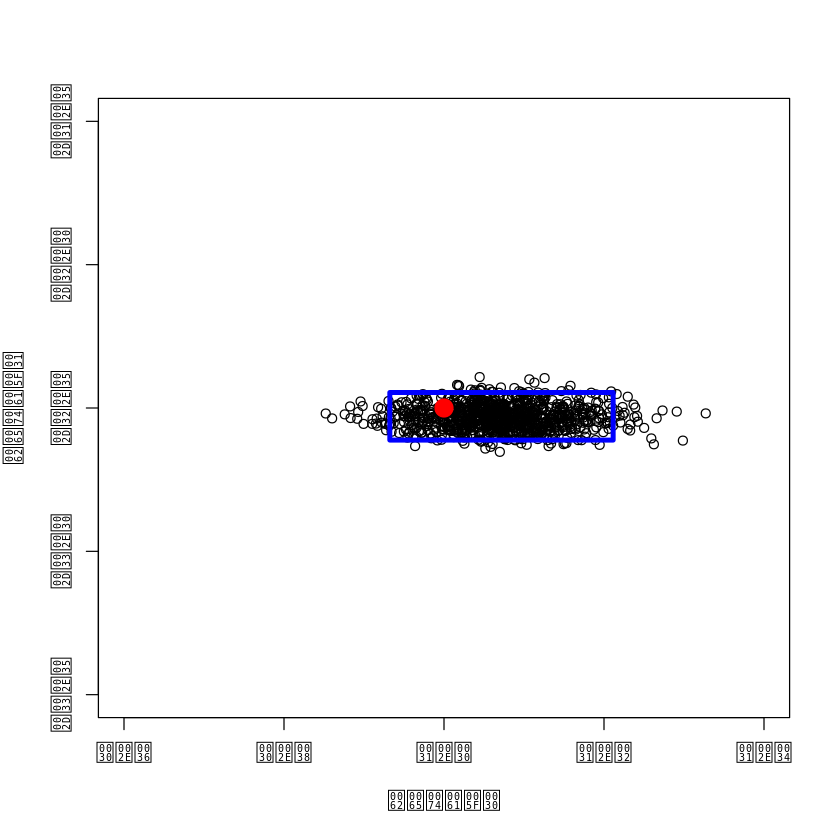

In [11]:
plot(beta_0,beta_1)
points(coeficients[1],coeficients[2])
points(beta_0_estimated,beta_1_estimated)
points(beta_0,beta_1, pch = 20, col = 2, cex= 3)
rect(
    intervalo_bootstrapping$beta_0[1],
    intervalo_bootstrapping$beta_1[1],
    intervalo_bootstrapping$beta_0[2],
    intervalo_bootstrapping$beta_1[2],
    lwd = 4, 
    border = 4
)

In [36]:
size_sample <- 7000
a <- 3
b <- 8

In [40]:
x <- seq(2,9,length.out = 1000)
y <- rnorm(size_sample, a , b )

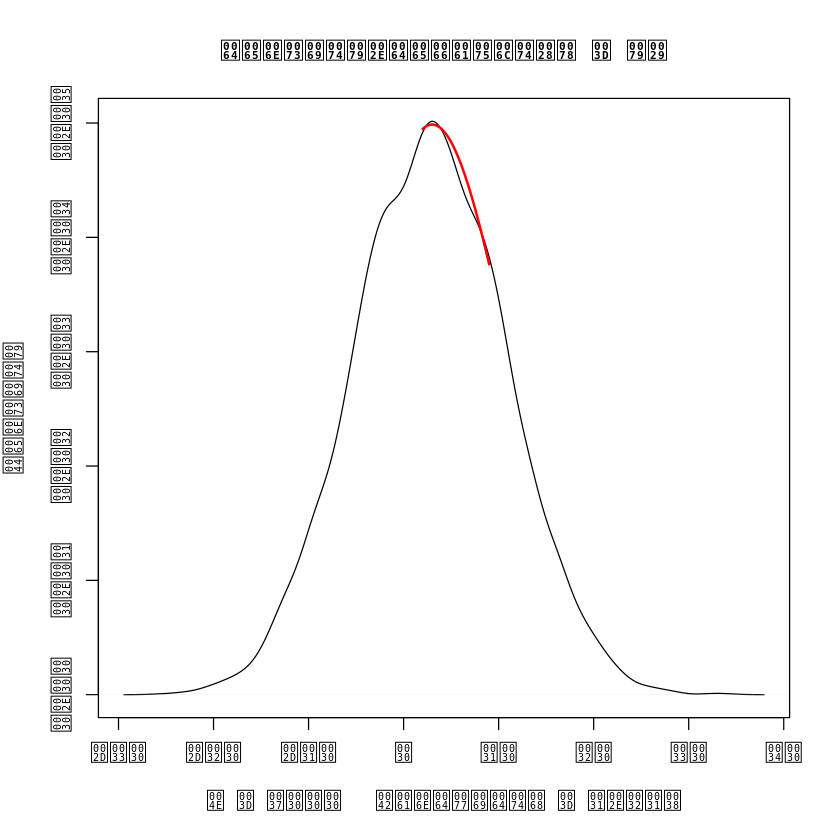

In [44]:
estimador_kernel <- density(y)
plot(estimador_kernel)
lines(x , dnorm(x,a,b), col = 2 , lwd = 2)
